In [163]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
#import sys
#sys.path.append('/home/shenxk/LIDC/pylidc')

import pylidc2 as pl
from pylidc2.Annotation import feature_names as fnames

config = {}
config['savepath'] = '/home/shenxk/LIDC/prepared_data'

os.chdir(config['savepath'])

In [164]:
all_scans = pl.query(pl.Scan)
savepath = config['savepath']
num = 2
#num = scan.count()
with open('names.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['short_name','origin_path'])
    
for id in range(num):
    images = all_scans[id].load_all_dicom_images()
    first_image = images[0].pixel_array
    [width, height] = first_image.shape
    num_slices = len(images)
    print(num_slices)
    images_array = np.zeros((num_slices, width, height))
    for i in range(num_slices):
        images_array[i,:,:] = images[i].pixel_array
    
    path = all_scans[id].get_path_to_dicom_files()
    shortname = '0'*(4-len(str(id+1)))+str(id+1)
    np.save(os.path.join(savepath, shortname+'.npy'), images_array)

    with open('names.csv', 'a') as f:
        
        #fieldnames = ['short_name', 'origin_path']
        #writer = csv.DictWriter(f, fieldnames=fieldnames)
        #writer.writeheader()
        writer = csv.writer(f)
        writer.writerow([shortname, path])



Loading dicom files ... This may take a moment.
87
Loading dicom files ... This may take a moment.
136


In [165]:
all_anns = pl.query(pl.Annotation).join(pl.Scan)
print(all_anns.count())

anns_2 = all_anns.filter(pl.Annotation.scan_id==2)
print(anns_2[0])
print(anns_2.count())

all_scans = pl.query(pl.Scan)
images = all_scans[1]
anns_2_clustered = images.cluster_annotations()
#print(len(anns_2_clustered))
#print(len(anns_2_clustered[0]))

#anns_2[0].contours_to_matrix

6859
Annotation(id=14,scan_id=2)
9


In [168]:
anns_set = anns_2[0]._as_set()
#anns_set = anns_set.sorted()
anns_list = [i for i in anns_set]
print(len(anns_list))

#print(anns_list)
#print(anns_list[0:10])


1531
[(130.0, 364.0, 83.0), (119.0, 369.0, 82.0), (120.0, 373.0, 84.0), (119.0, 381.0, 83.0), (128.0, 372.0, 81.0), (123.0, 368.0, 82.0), (128.0, 376.0, 82.0), (127.0, 374.0, 86.0), (132.0, 370.0, 81.0), (115.0, 371.0, 83.0)]


In [193]:
ct_volume, mask = anns_2[0].uniform_cubic_resample(side_length=35)
print(ct_volume.shape, mask.shape)
#plt.imshow(ct_volume[:,:,35] * (0.2 + 0.8*mask[:,:,35]) )


Loading dicom files ... This may take a moment.
(36, 36, 36) (36, 36, 36)


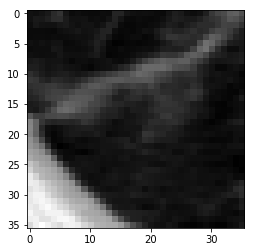

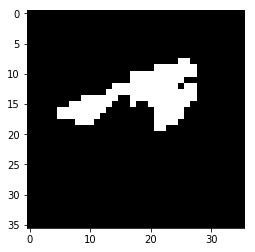

In [194]:
plt.imshow(ct_volume[:,:,10],cmap = plt.cm.gray)
plt.show()
plt.imshow(mask[:,:,10],cmap = plt.cm.gray)
plt.show()

(4, 29, 43, 11)
(29, 43, 11)


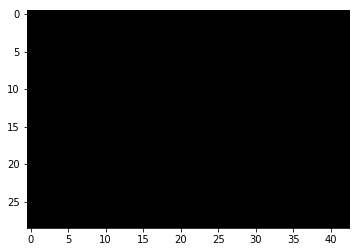

In [296]:
#type(anns_2_clustered[2][0])
mask0, bbox0 = anns_2_clustered[2][0].get_boolean_mask(return_bbox=True)
mask1, bbox1 = anns_2_clustered[2][1].get_boolean_mask(return_bbox=True)
mask2, bbox2 = anns_2_clustered[2][2].get_boolean_mask(return_bbox=True)
mask3, bbox3 = anns_2_clustered[2][3].get_boolean_mask(return_bbox=True)
bbox_min = np.zeros(3)
bbox_min[0] = np.min([bbox0[0,0], bbox1[0,0], bbox2[0,0], bbox3[0,0]])
bbox_min[1] = np.min([bbox0[1,0], bbox1[1,0], bbox2[1,0], bbox3[1,0]])
bbox_min[2] = np.min([bbox0[2,0], bbox1[2,0], bbox2[2,0], bbox3[2,0]])
bbox_max = np.zeros(3)
bbox_max[0] = np.max([bbox0[0,1], bbox1[0,1], bbox2[0,1], bbox3[0,1]])
bbox_max[1] = np.max([bbox0[1,1], bbox1[1,1], bbox2[1,1], bbox3[1,1]])
bbox_max[2] = np.max([bbox0[2,1], bbox1[2,1], bbox2[2,1], bbox3[2,1]])

slice_thickness = 2.0
mask_new = np.zeros((4,int(bbox_max[0] - bbox_min[0]+1),int(bbox_max[1] - bbox_min[1]+1),int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))

margin0 = bbox0[:,0] - bbox_min
margin1 = bbox1[:,0] - bbox_min
margin2 = bbox2[:,0] - bbox_min
margin3 = bbox3[:,0] - bbox_min
margin0 = np.asarray(margin0, dtype=int)
margin1 = np.asarray(margin1, dtype=int)
margin2 = np.asarray(margin2, dtype=int)
margin3 = np.asarray(margin3, dtype=int)

mask_new[0,margin0[0]:int(margin0[0]+(bbox0[0,1]-bbox0[0,0])+1),margin0[1]:int(margin0[1]+(bbox0[1,1]-bbox0[1,0])+1),
         margin0[2]:int((margin0[2]+(bbox0[2,1]-bbox0[2,0])/slice_thickness+1))] = mask0
mask_new[1,margin1[0]:int(margin1[0]+(bbox1[0,1]-bbox1[0,0])+1),margin1[1]:int(margin1[1]+(bbox1[1,1]-bbox1[1,0])+1),
         margin1[2]:int((margin1[2]+(bbox1[2,1]-bbox1[2,0])/slice_thickness+1))] = mask1
mask_new[2,margin2[0]:int(margin2[0]+(bbox2[0,1]-bbox2[0,0])+1),margin2[1]:int(margin2[1]+(bbox2[1,1]-bbox2[1,0])+1),
         margin2[2]:int((margin2[2]+(bbox2[2,1]-bbox2[2,0])/slice_thickness+1))] = mask2
mask_new[3,margin3[0]:int(margin3[0]+(bbox3[0,1]-bbox3[0,0])+1),margin3[1]:int(margin3[1]+(bbox3[1,1]-bbox3[1,0])+1),
         margin3[2]:int((margin3[2]+(bbox3[2,1]-bbox3[2,0])/slice_thickness+1))] = mask3

print(mask_new.shape)
[p, width, height, z] = mask_new.shape
#plt.imshow(mask_new[0,:,:,8],cmap = plt.cm.gray)
#plt.show()
mask_sum = np.zeros(mask_new.shape[1:])
mask_final = np.zeros(mask_new.shape[1:])

for i in range(width):
    for j in range(height):
        for k in range(z):
            mask_sum[i,j,k] = np.sum(mask_new[:,i,j,k])
            if mask_sum[i,j,k] >= 3:
                mask_final[i,j,k] = 1
print(mask_final.shape)

plt.imshow(mask_final[:,:,1],cmap = plt.cm.gray)
plt.show()

In [259]:
mask_new = np.zeros((int(bbox_max[0] - bbox_min[0]),int(bbox_max[1] - bbox_min[1]),int((bbox_max[2] - bbox_min[2])/slice_thickness+1)))
print(mask_new.shape)
print(mask_new[1:28,:,:].shape)

(28, 42, 10)
(27, 42, 10)


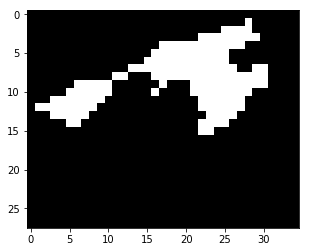

[[  360.    387. ]
 [  104.    138. ]
 [ 1448.5  1460.5]]
(28, 35, 7)


In [249]:
mask, bbox = anns_2[0].get_boolean_mask(return_bbox=True)
plt.imshow(mask[:,:,0],cmap = plt.cm.gray)
plt.show()
print(bbox)
type(bbox)
print(mask.shape)

In [188]:
print(len(anns_2_clustered[0]),len(anns_2_clustered[1]),len(anns_2_clustered[2]))
anns_2[0].estimate_diameter()

4 1 4


23.919498364305202

Loading dicom files ... This may take a moment.


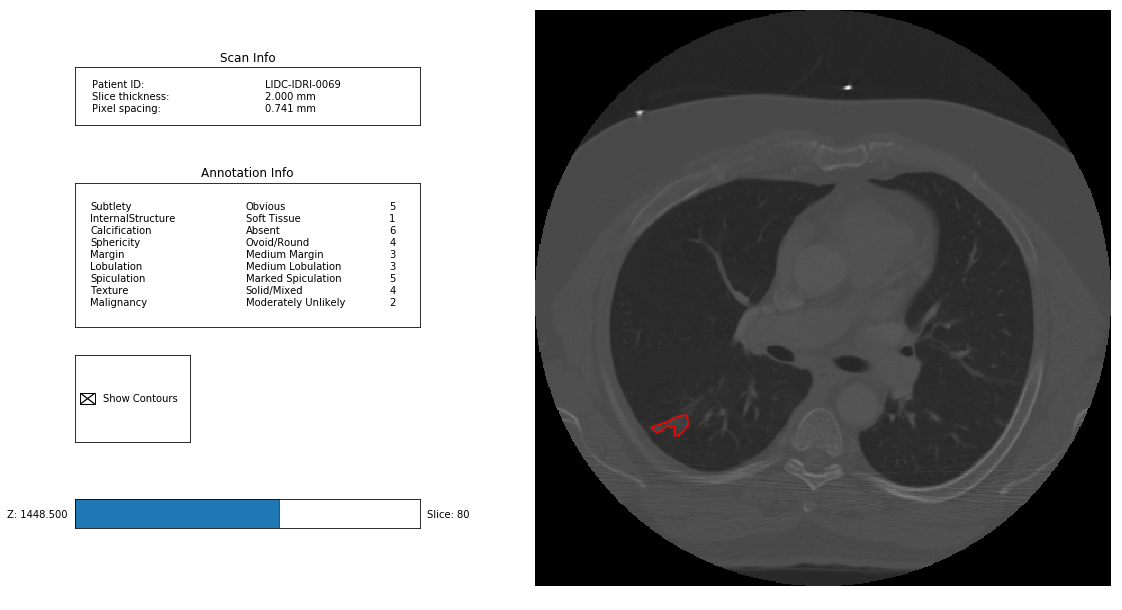

In [87]:
anns_2_clustered[2][3].visualize_in_scan()

Loading dicom files ... This may take a moment.


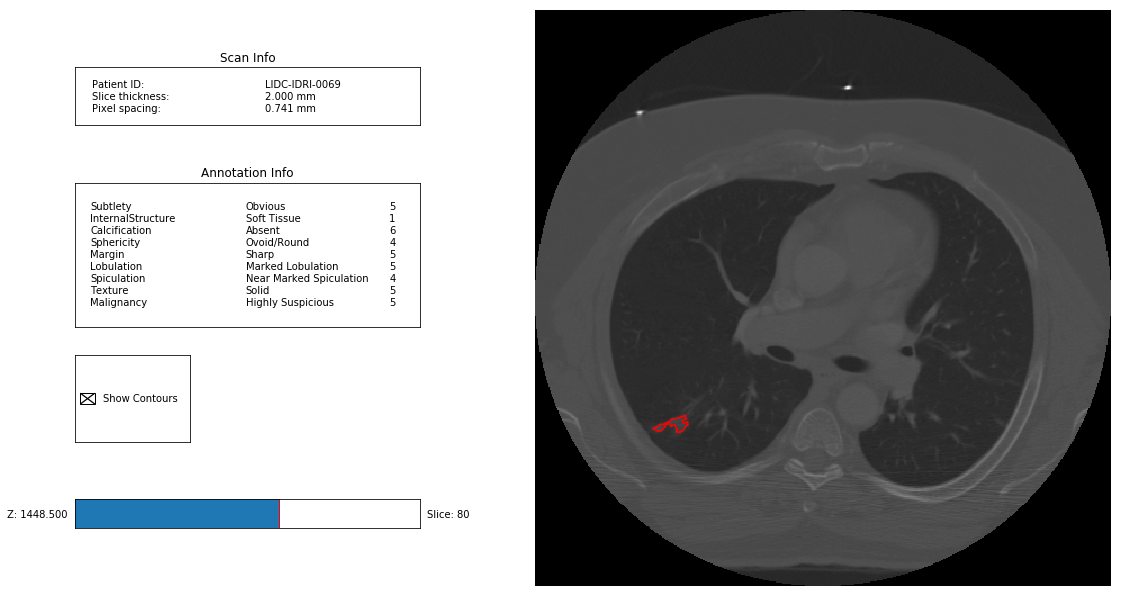

In [77]:
anns_2[0].visualize_in_scan()

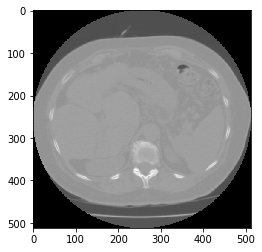

In [50]:

images = np.load('0000.npy')

plt.imshow( images[0], cmap=plt.cm.gray )
plt.show()

In [118]:
images = anns_2[0].scan.load_all_dicom_images()
# Preload contours and sort them by z pos.
contours = sorted(anns_2[0].contours, key=lambda c: c.image_z_position)
fnames = anns_2[0].scan.sorted_dicom_file_names.split(',')
index_of_contour = fnames.index(contours[2].dicom_file_name)
print(len(fnames))
print(len(contours))
print(index_of_contour)

Loading dicom files ... This may take a moment.
136
7
82
